#### Final Project: Milestone #4
The purpose of this notebook is to perform analysis on the CSV file swift_songs_cleaned, which consists of data from Spotify's API on all songs listed on Spotify for Taylor Swift. The analysis will be performed visually using Seaborn plots to answer three question relating to the popularity and energy of the tracks.
- Yashi Bajpai
- CMP-262 (In-Person)
- December 4, 2024

#### ———  code setup

↓ importing libraries

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

↓ reads the csv file into a dataframe

In [49]:
swift_songs = pd.read_csv("swift_songs_cleaned.csv")

#### ———  question 1: What are the most popular Taylor Swift albums based on Spotify popularity scores?

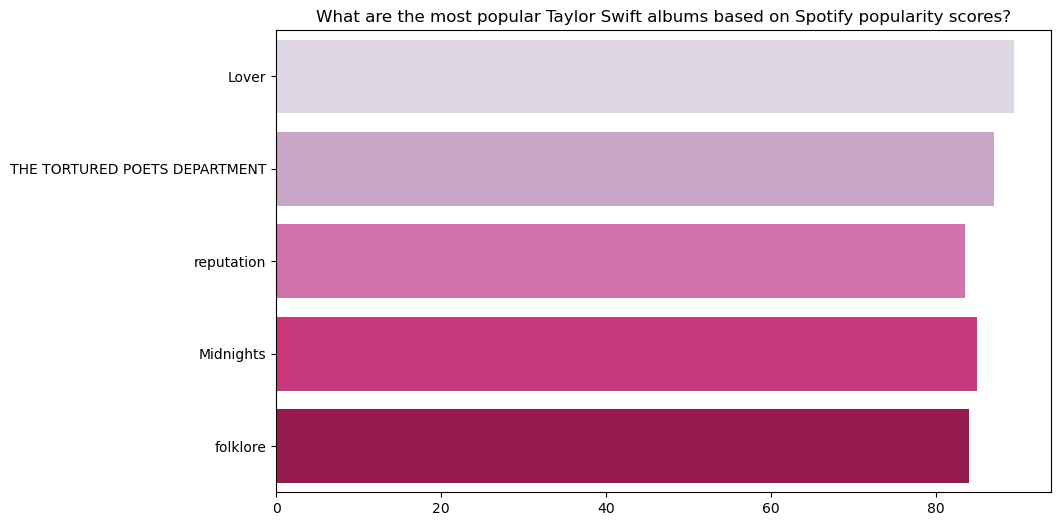

In [51]:
top_songs = swift_songs.sort_values(by='popularity', ascending=False).head(10)[['album', 'popularity']] # uses the built-in sort_values function to sort the popularity by descending order, then uses head to output the top 10

plt.figure(figsize=(10, 6)) # sets the size of the plot 
sns.barplot(data=top_songs, x='popularity', y='album', palette='PuRd', hue='album', legend=False, errorbar=None) # creates a bar plot showing the top ten taylor swift songs with the highest popularity 
plt.title('What are the most popular Taylor Swift albums based on Spotify popularity scores?') # sets the title for the plot
plt.ylabel('') # sets an empty label for the y-axis  
plt.xlabel('') # sets an empty label for the x-axis
plt.show() # displays the plot

↑ As seen in the above plot, the most popular Taylor Swift albums based on Spotify popularity scores are Lover, The Tortured Poets Department, Reputation, Midnights, and Folklore.

#### ———  question 2: How do the energy levels of tracks vary across different albums?

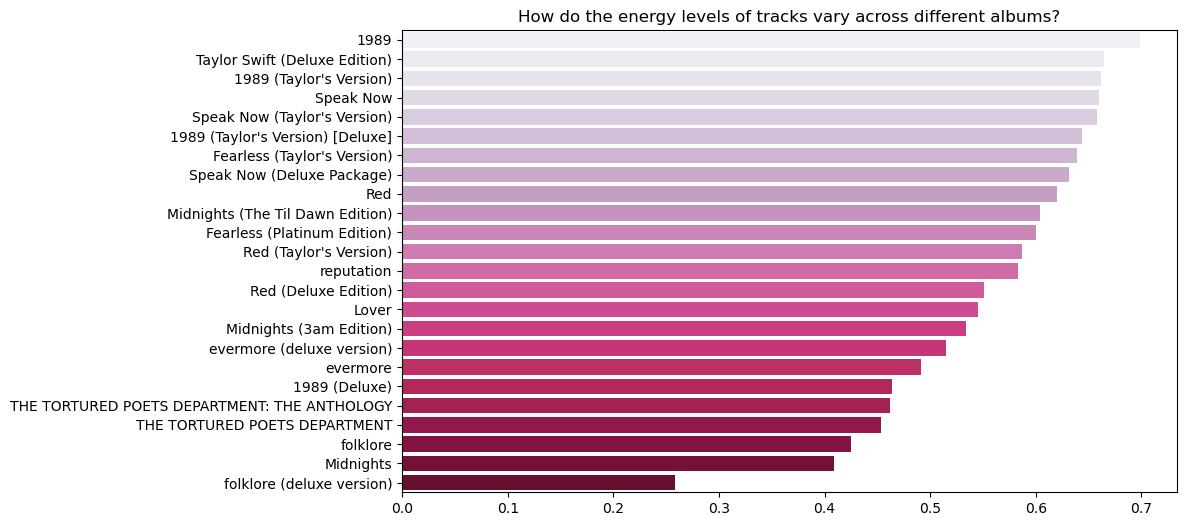

In [54]:
energy_avg = swift_songs.groupby('album', as_index=False)['energy'].mean() # groups the dataset by album and calculates the average energy for each group

energy_avg = energy_avg.sort_values(by='energy', ascending=False) # sorts the albums by average energy in descending order

plt.figure(figsize=(10, 6)) # sets the size of the plot 
sns.barplot(data=energy_avg, x='energy', y='album', palette='PuRd', hue='album', legend=False) # creates a bar plot showing the energy tracks among all the albums 
plt.title('How do the energy levels of tracks vary across different albums?') # sets the title for the plot
plt.ylabel('') # sets an empty label for the y-axis  
plt.xlabel('') # sets an empty label for the x-axis
plt.show() # displays the plot

↑ As seen in the above plot, the energy levels of Taylor Swift's tracks show significant variation across her albums. Albums such as 1989 and Speak Now have the highest average energy levels, indicating more upbeat and lively tracks. In contrast, albums like Folklore and Midnights have noticeably lower average energy levels, reflecting a softer, more laid-back style.

#### ———  question 3: Is there a correlation between the average energy and popularity in Taylor Swift’s albums?

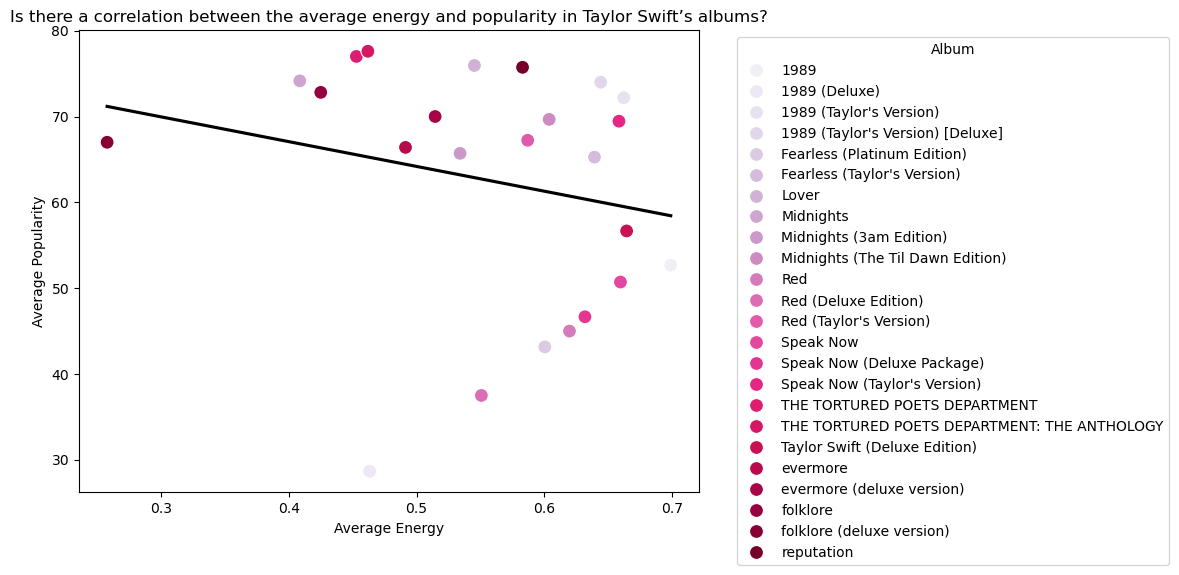

In [57]:
album_avg = swift_songs.groupby('album', as_index=False)[['energy', 'popularity']].mean() # groups the dataset by album and calculates the mean values for energy and popularity
correlation = album_avg['energy'].corr(album_avg['popularity']) # calculates the correlation between average energy and average popularity across albums

plt.figure(figsize=(8, 6)) # sets the size of the plot 
sns.scatterplot(data=album_avg, x='energy', y='popularity', palette='PuRd', hue='album', s=100) # plots a scatterplot for average energy vs. popularity, with colors based on album
sns.regplot(data=album_avg, x='energy', y='popularity', scatter=False, color='black', ci=None) # adds a regression line to the scatterplot without a confidence interval
"""
scatter=False - disables points for the regression line
ci=None - disables the confidence interval around the regression line
"""

plt.title('Is there a correlation between the average energy and popularity in Taylor Swift’s albums?') # sets the title for the plot
plt.xlabel('Average Energy') # sets label for x-axis
plt.ylabel('Average Popularity') # sets label for y-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Album') # moves the legend to the right of the plot and adds a title to the legend
plt.show() # displays the plot

↑ As seen in the above plot, there is a slight negative correlation between the average energy and popularity in Taylor Swift’s albums. The regression line shows a downward trend, indicating that albums with higher average energy tend to have slightly lower average popularity scores. However, the correlation does not appear to be strong, as the data points are scattered widely around the regression line. This suggests that while there may be some relationship, energy does not primarily determine an album's popularity.